# Lesson: 4_sMRI_preproc_spatial_normalization

## Objectives
- Visualize templates and understand registration process

## Python Requirements
- [matplotlib](https://matplotlib.org/)
- [nibabel](https://nipy.org/nibabel/)
- [nilearn](https://nilearn.github.io/index.html)

## Useful resources:
- FreeSurfer output [description](https://surfer.nmr.mgh.harvard.edu/fswiki/ReconAllTableStableV5.3)
- Nipype [snippets](https://miykael.github.io/nipype_tutorial/): 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting
from nilearn import image
from nibabel.affines import apply_affine
import os

## Local paths

In [2]:
local_data_dir = '../local_data/'
subject_dir = local_data_dir +  "2_sMRI_cleanup/sub001/"
fsaverage_dir = local_data_dir +  "3_sMRI_spatial_norm/fsaverage/"

## ICBM152_2009 template/atlas

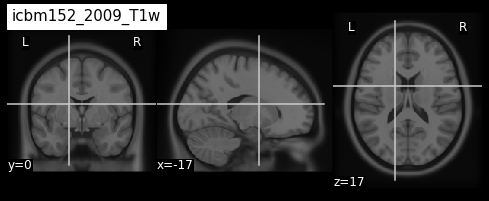

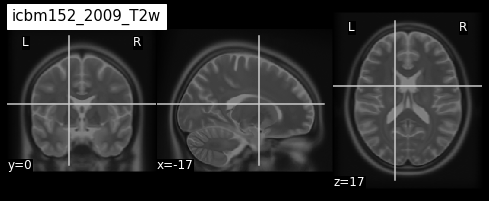

In [3]:
atlas = datasets.fetch_icbm152_2009()
cut_coords = (-17,0,17)
atlas_t1 = atlas["t1"]
atlas_t1_img = nib.load(atlas_t1)

atlas_t2 = atlas["t2"]
atlas_t2_img = nib.load(atlas_t2)

plotting.plot_anat(atlas_t1_img, title="icbm152_2009_T1w", cut_coords=cut_coords, vmax=200)
plotting.plot_anat(atlas_t2_img, title="icbm152_2009_T2w", cut_coords=cut_coords, vmax=200)

## Subject (native) space vs template (reference) space 

Text(0.5, 1.0, 'fsaverage reference space')

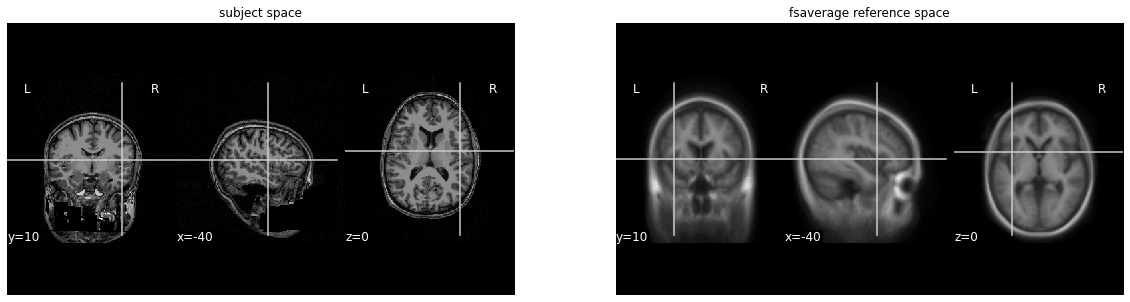

In [4]:
cut_coords = (-40,10,0)

# subject image
subject_T1 = subject_dir + 'mri/T1.mgz'
subject_T1_img = nib.load(subject_T1)

# fsaverage image
fsaverage_T1 = fsaverage_dir + "T1.mgz"
fsaverage_T1_img = nib.load(fsaverage_T1)

# plot
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(20,5))
ax=axes[0]
plotting.plot_anat(subject_T1_img, title="", cut_coords=cut_coords, vmax=200, axes=ax)
ax.set_title('subject space')

ax=axes[1]
plotting.plot_anat(fsaverage_T1, title="", cut_coords=cut_coords, vmax=200, axes=ax)
ax.set_title('fsaverage reference space')

## How do we map a point-location (cross-hairs) from subject space to the reference space? 
- Use affine transform from the registration (for freesurfer: talarirach.xfm)

Subject space to refernce space mapping:
 (-40, 10, 0) --> (47,-2,11)


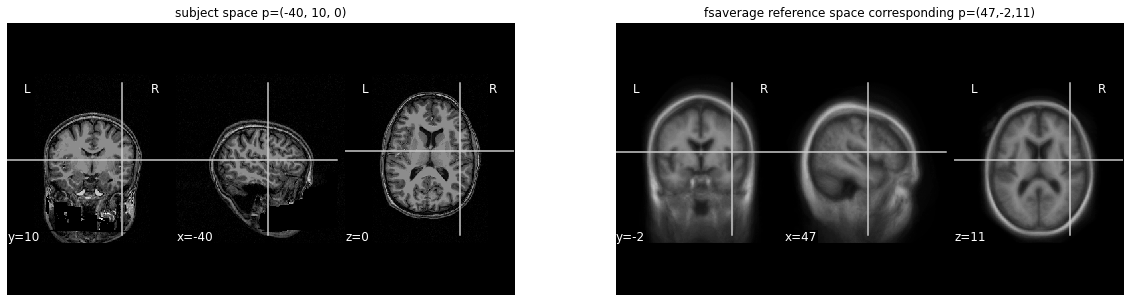

In [5]:
A = np.array([[1.053177, -0.061204, -0.060685, 90.310684],
             [0.070210, 1.009246, 0.117766, -9.806847],
             [0.023069, -0.117785, 1.186777, 13.209366],
             [0. ,0. , 0., 1.]])

cut_coords_affine_transformed = apply_affine(A, cut_coords)
x,y,z = cut_coords_affine_transformed
cut_coords_affine_transformed_str = "({},{},{})".format(int(x),int(y),int(z))

print("Subject space to refernce space mapping:\n {} --> {}".format(cut_coords,cut_coords_affine_transformed_str))
# plot
fig, axes = plt.subplots(1,2, sharex=True, sharey=True, figsize=(20,5))
ax=axes[0]
plotting.plot_anat(subject_T1_img, title="", cut_coords=cut_coords, vmax=200, axes=ax)
ax.set_title('subject space p={}'.format(cut_coords))

ax=axes[1]
plotting.plot_anat(fsaverage_T1, title="", cut_coords=cut_coords_affine_transformed, vmax=200, axes=ax)
ax.set_title('fsaverage reference space corresponding p={}'.format(cut_coords_affine_transformed_str));